# Mall Customer Segmentation using KMeans Clustering

K-means is a clustering technique that combines related data points in unsupervised machine learning. The technique is often used for many different tasks, including anomaly detection, customer segmentation, and picture segmentation.

With K-means, the user tells the algorithm how many clusters to create. The algorithm then updates the centroid based on the mean of all the data points given to that cluster after assigning each data point repeatedly to the closest centroid (mean) of a cluster. Once the centroids stop fluctuating considerably or the maximum number of iterations has been achieved, the algorithm keeps doing this. The initial location of the centroids may have an impact on the K-means algorithm since it can cause it to get trapped in local optimums. To discover the optimal answer, many runs with various initializations are often carried out. Also, the user must tell the algorithm how many clusters to create, which might be challenging if the ideal number of clusters is unknown.

Using the K-Means technique, "Customer Segmentation using K-Means" divides consumers into several categories according to their purchase habits. With the aid of this project, organisations will be better able to comprehend their target markets and target certain groups with relevant marketing initiatives and product lines.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [5]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual Income Column & Spending Score column

In [7]:
X = customer_data.iloc[:,[3,4]].values

In [8]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Choosing the number of clusters

# WCSS -> Within Clusters Sum of Squares

In [10]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

C:\Users\PRADEEPAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


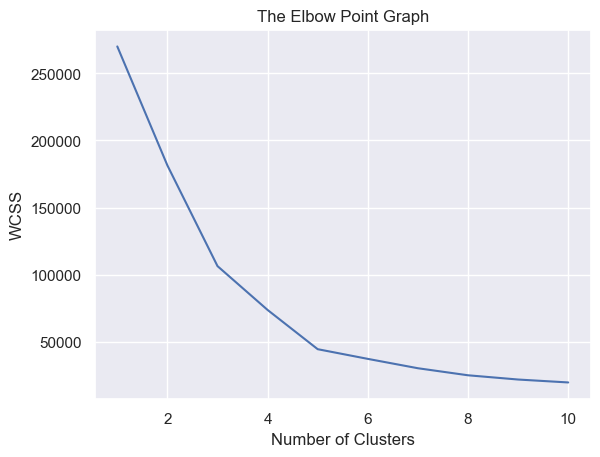

In [11]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Optimum Number of Clusters = 5

# Training the k-Means Clustering Model

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters - 0, 1, 2, 3, 4

# Visualizing all the Clusters

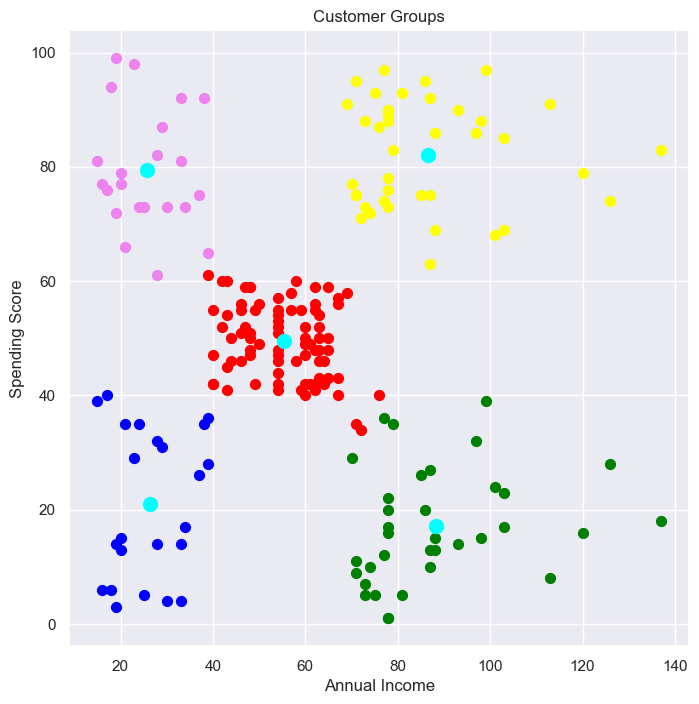

In [14]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Cluster 1: Average Income, Average Spending Score
# Cluster 2: High Income, Low Spending Score
# Cluster 3: Low Income, Low Spending Score
# Cluster 4: Low Income, High Spending Score
# Cluster 5: High Income, High Spending Score

In [19]:
oneData = customer_data.iloc[Y == 0, :]
twoData = customer_data.iloc[Y == 1, :]
threeData = customer_data.iloc[Y == 2, :]
fourData = customer_data.iloc[Y == 3, :]
fiveData = customer_data.iloc[Y == 4, :]

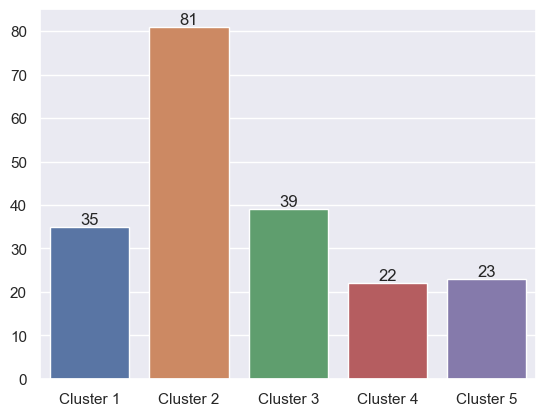

In [20]:
ax = sns.barplot(x = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                 y = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
ax.bar_label(container = ax.containers[0],labels = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
plt.show()

# Conclusion
According to the findings of the study, the following are the concluding observations drawn from the dataset about each cluster:


Cluster 1 has the greatest number of persons who both have a respectable income and a respectable level of expenditures. In order to maintain their attention, they should get frequent updates as well as offers for special promotions.

Cluster 2 has a high income but not as much shopping activity as Cluster 1. Because of their capacity for spending, these individuals should be the focus of marketing efforts. Their historical data should be analysed in order to tailor the promotional messages that are sent to them in order to rekindle their interest.

Cluster 3 should be disregarded since it does not have the financial capability to spend and it does not shown any interest in spending.

Cluster 4 is a high-risk group due to the fact that they do not have the capability of spending money, yet they have a high spending score. Consumers need to be provided with additional coupons that are based on discounts.

Cluster 5 is the most desirable group to belong to since their spending score is high in addition to their high income score. Users should get frequent promos and information in their inbox.